# Exploring Linear Regression with an Example. (Diamond)


Scenario: We need to Predict the price of a Diamond by different features.

# Importing All required packages

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
# allow plots to appear direcly in the notebook
%matplotlib inline
print("Import completed")

Import completed


# Importing the Dataset (Diamond)

In [49]:
ds = pd.read_csv('https://raw.githubusercontent.com/SudhakarAnemu/Term-2/master/Data/diamonds.csv', index_col=0)
ds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Price is the dependent variable where we need to predict this based on independent features like carat, cut, coloer, clarity, depth and table.

# EDA (Exploratory Data Analysis)

In [127]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Shape of the Dataset : ", ds.shape)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Columns of the data frame : ",ds.columns)
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Info of the Dataset : ", ds.info())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Description of the Dataset : ", ds.describe())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("Verify the count of Null", ds.isnull().sum())

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of the Dataset :  (53940, 7)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Columns of the data frame :  Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 7 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
dtypes: float64(3), int64(1), object(3)
memory usage: 3.3+ MB
Info of the Dataset :  None
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Description of the Dataset :                carat         depth         table         price
count  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.74940

## Pre Profiling : 

SA : Price is the independent variable where it is dependent on Carat so analyzing how it is very correlated with Carat.
price is highly correlated with carat (ρ = 0.92159) Rejected

SA : Deleting below three features since these are highliy coreated with Carat

x is highly correlated with carat (ρ = 0.97509) Rejected
y is highly correlated with x (ρ = 0.9747) Rejected
z is highly correlated with y (ρ = 0.95201) Rejected



## FInding unique values of all Features

In [57]:
print("Dataframe Before Droping features : ", ds.columns)
ds.drop('x', axis=1, inplace=True)
ds.drop('y', axis=1, inplace=True)
ds.drop('z', axis=1, inplace=True)
print("Dataframe After Droping features : ", ds.columns)

Dataframe Before Droping features :  Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price'], dtype='object')


KeyError: ignored

In [113]:
colList = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price']
for i in range(0,len(colList)):
    print("Name of the column : ",colList[i])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
    print(ds[colList[i]].unique())
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~End~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n")
print("End of For")

Name of the column :  carat
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~Start~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 

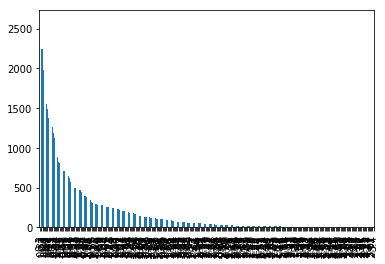

In [53]:
ds["carat"].value_counts().plot.bar()

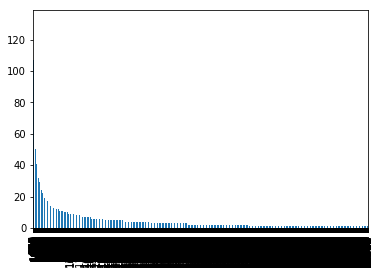

In [54]:
ds["price"].value_counts().plot.bar()

## Distribution of Features

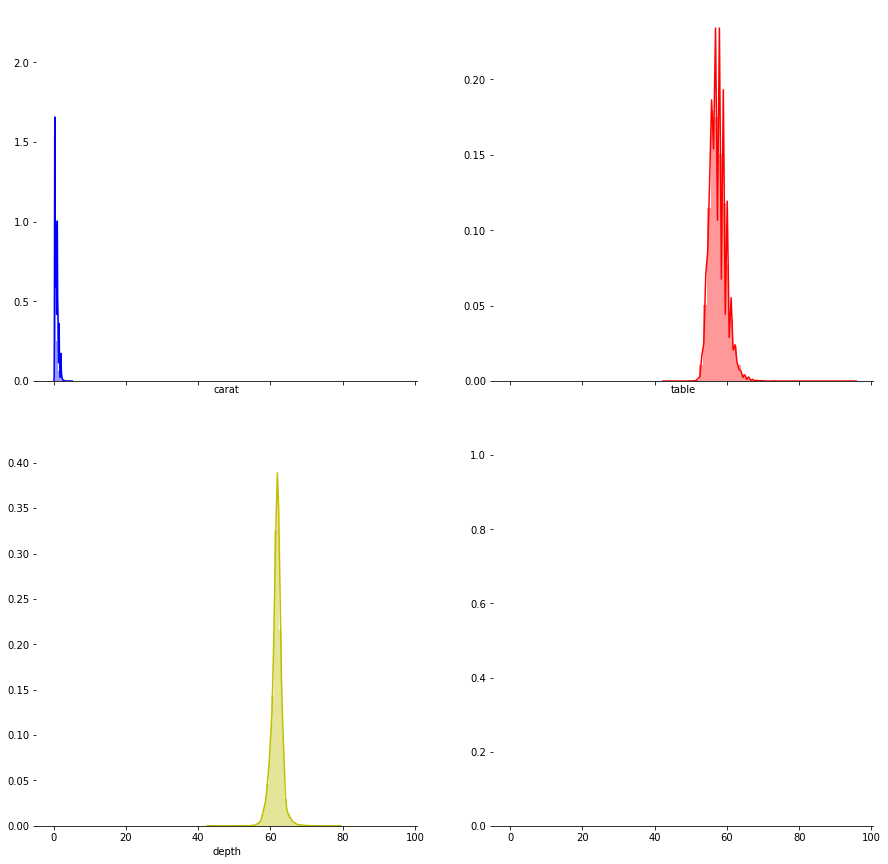

In [80]:
f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=True)   

sns.despine(left=True) #It removes the border of each plot
sns.distplot(ds.carat, color="b", ax=axes[0, 0])
sns.distplot(ds.table, color="r", ax=axes[0, 1])
sns.distplot(ds.depth, color="y", ax=axes[1, 0])  

#
#SA : 
#1. This graph will not support for Category.
#2. sns.despine #It removes the border of each plot
#3 - #sns.distplot(ds.price, color="g", ax=axes[0, 1])  -- I removed this since it is effecting lot to other features since Price reange is very high if we compare with others. 
#

Price data :  [ 326  327  334 ... 2753 2755 2756]
Price data : Min 326
Price data : Max 18823
Price data : Mean 7522.8357179796585


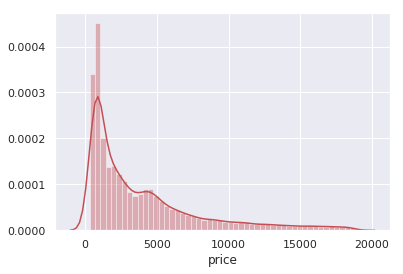

In [133]:
arr = ds["price"].unique()
print("Price data : ", arr)
print("Price data : Min", arr.min())
print("Price data : Max", arr.max())
print("Price data : Mean", arr.mean())
sns.set();
sns.distplot(ds.price, color="r", hist=True, kde=True)

carat data :  [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 

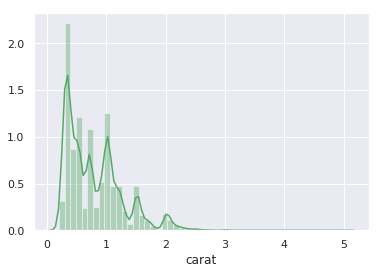

In [136]:
arr = ds["carat"].unique()
print("carat data : ", arr)
print("carat data : Min", arr.min())
print("carat data : Max", arr.max())
print("carat data : Mean", arr.mean())
sns.set();
sns.distplot(ds.carat, color="g", hist=True, kde=True)

table data :  [55.  61.  65.  58.  57.  56.  54.  62.  59.  63.  60.  55.3 69.  53.
 64.  56.4 60.5 67.  52.  55.8 66.  70.  68.  54.4 57.1 53.6 54.8 54.2
 54.9 56.7 53.9 57.8 54.1 55.1 51.  58.1 56.9 56.5 53.7 60.7 56.2 56.6
 56.1 56.3 57.2 57.5 60.9 59.8 62.3 60.1 55.9 50.1 62.2 54.5 55.7 53.4
 54.7 58.8 59.4 62.5 54.3 60.6 55.2 58.6 49.  50.  54.6 62.6 57.7 56.8
 57.9 60.3 55.6 59.5 57.4 62.4 60.4 53.3 60.2 60.8 58.5 57.6 43.  59.9
 63.5 57.3 61.4 58.3 55.4 58.2 53.5 59.7 55.5 58.7 53.8 59.1 53.2 59.3
 61.1 51.6 95.  61.2 59.2 58.4 53.1 52.8 44.  61.3 61.9 61.8 59.6 61.5
 58.9 64.3 62.8 71.  52.4 63.3 61.7 64.2 73.  65.4 63.4 62.1 79.  76.
 61.6]
table data : Min 43.0
table data : Max 95.0
table data : Mean 58.86141732283464


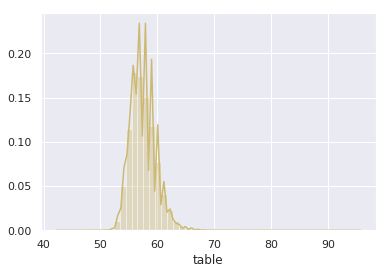

In [137]:
arr = ds["table"].unique()
print("table data : ", arr)
print("table data : Min", arr.min())
print("table data : Max", arr.max())
print("table data : Mean", arr.mean())
sns.set();
sns.distplot(ds.table, color="y", hist=True, kde=True)

depth data :  [61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 64.  60.4 62.2 60.2
 60.9 62.  63.4 63.8 62.7 61.  58.1 62.5 60.5 60.  60.7 59.5 58.2 64.1
 60.8 61.8 61.2 61.1 65.2 58.4 63.1 61.6 59.3 62.6 63.  63.2 62.1 61.4
 62.9 63.7 59.2 59.9 57.9 55.1 57.5 66.3 61.7 58.8 64.5 65.3 59.6 64.4
 65.7 63.6 61.3 60.1 60.3 58.  64.6 59.7 57.8 67.9 60.6 57.2 64.2 65.8
 67.4 59.  63.5 67.3 58.7 66.4 68.1 63.9 55.  58.6 64.3 58.5 65.  56.
 58.3 53.1 64.9 59.1 58.9 66.7 57.7 65.4 53.3 53.  67.8 66.1 55.8 67.6
 68.2 65.5 67.7 69.5 56.6 56.3 66.9 66.  67.  57.6 67.1 65.6 64.8 69.3
 66.2 55.4 66.8 64.7 66.6 55.9 57.3 57.4 68.3 68.5 56.2 65.9 56.5 56.1
 66.5 68.4 69.7 57.1 68.7 56.7 68.6 71.6 43.  68.8 67.5 69.  55.2 68.9
 69.6 57.  56.4 56.8 44.  67.2 70.1 71.3 70.6 69.8 71.8 53.8 53.2 70.
 69.4 68.  70.2 50.8 55.6 70.5 71.  69.1 55.3 54.2 51.  70.8 54.6 54.
 54.4 52.3 55.5 78.2 71.2 52.7 54.3 69.2 73.6 52.2 69.9 53.4 72.2 79.
 72.9 54.7]
depth data : Min 43.0
depth data : Max 79.0
depth data 

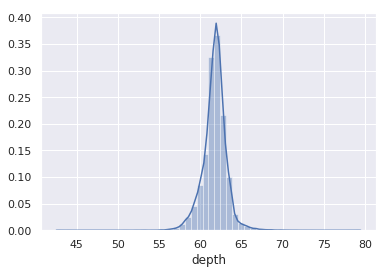

In [138]:
arr = ds["depth"].unique()
print("depth data : ", arr)
print("depth data : Min", arr.min())
print("depth data : Max", arr.max())
print("depth data : Mean", arr.mean())
sns.set();
sns.distplot(ds.depth, color="b", hist=True, kde=True)

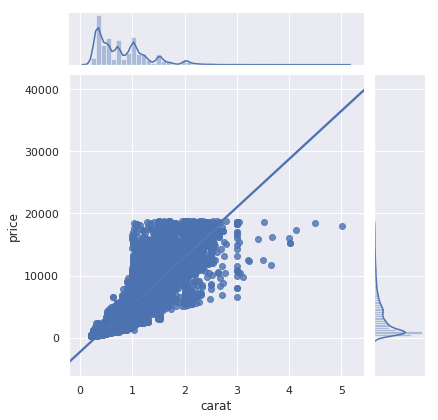

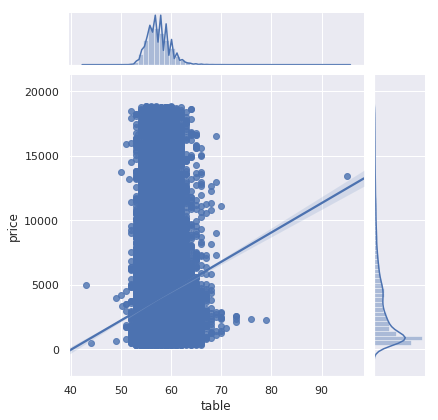

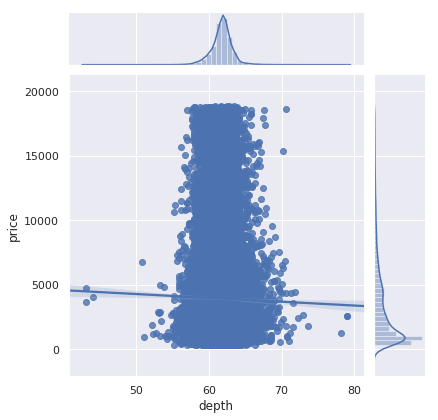

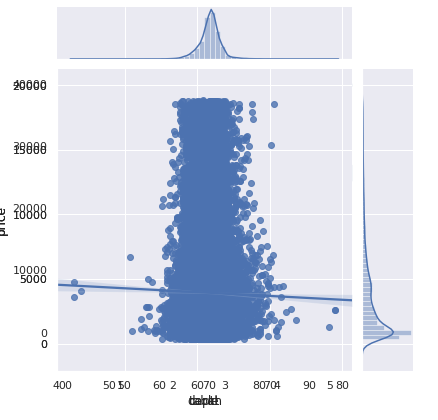

In [112]:
JG1 = sns.jointplot("carat", "price", data=ds, kind='reg')
JG2 = sns.jointplot("table", "price", data=ds, kind='reg')
JG3 = sns.jointplot("depth", "price", data=ds, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)